# Predicting Which Passengers were Transported

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting which passengers of Space Ship Titanic were transported by the anomaly using personal records recovered from the spaceship’s damaged computer system.

## 1. Problem Definition
> Spaceship titanic collided with a spacetime anomaly. Half the passengers were transported to an alternate dimension.
Given the spaceship's manifest of almost 13,000 passengers, can we predict which passengers were transported to the
alternate dimension?

## 2. Data
> The data is from Kaggle's Spaceship Titanic competition and was downloaded as a csv file from the following link:
https://www.kaggle.com/competitions/spaceship-titanic/data

## 3. Evaluation 

>Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

## 4. Features
**Data Dictionary**
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* **Destination** - The planet the passenger will be debarking to.

* **Age** - The age of the passenger.

* **VIP** - Whether the passenger has paid for special VIP service during the voyage.

* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* **Name** - The first and last names of the passenger.

* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Preparing the tools
We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation

In [1]:
#Exploraroty Data Analysis and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading the Data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
# drop null values

In [7]:
df_not_null = df.dropna()

In [8]:
print(f"Toal null values dropped: {len(df) - len(df_not_null)}")

Toal null values dropped: 2087


In [9]:
df = df_not_null

In [10]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

### Nonnumerical atrtibutes

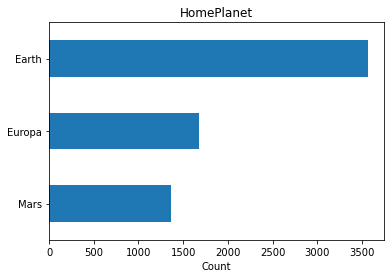

In [11]:
df["HomePlanet"].value_counts().plot(kind="barh")
plt.xlabel("Count")
plt.title("HomePlanet")
plt.gca().invert_yaxis()

In [12]:
df["CryoSleep"].value_counts()

False    4274
True     2332
Name: CryoSleep, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

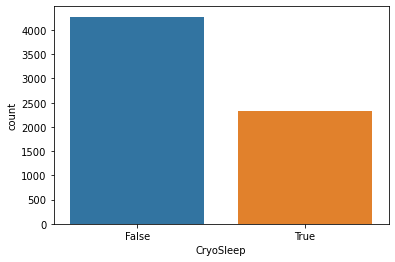

In [13]:
sns.countplot(df["CryoSleep"])

In [14]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


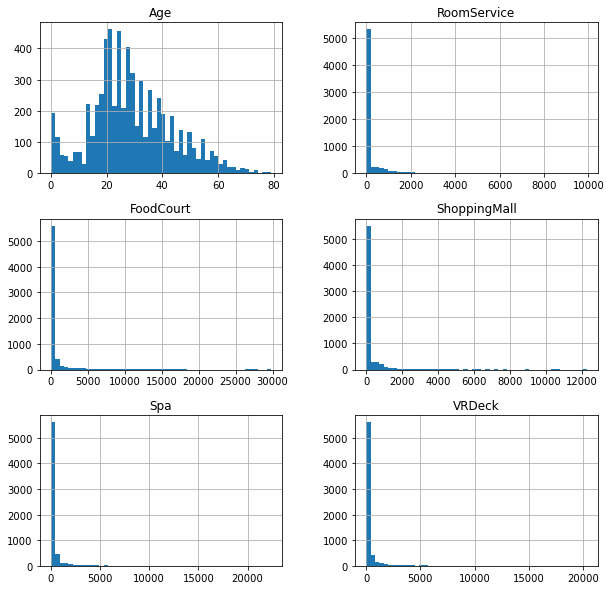

In [15]:
df.hist(bins=50, figsize=(10,10))
plt.show()

**Analysis of Transported-Age wise**

<AxesSubplot:>

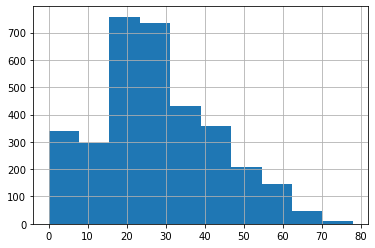

In [16]:
age_transported_true = df[df["Transported"]==True]["Age"]
age_transported_true.hist()

In [17]:
age_transported_true.describe() 

count    3327.000000
mean       27.703036
std        15.266569
min         0.000000
25%        18.000000
50%        26.000000
75%        37.000000
max        78.000000
Name: Age, dtype: float64

<AxesSubplot:>

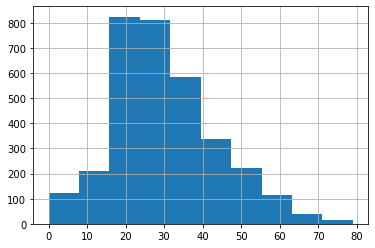

In [18]:
age_transported_false = df[df["Transported"]==False]["Age"]
age_transported_false.hist()

In [19]:
age_transported_false.describe()

count    3279.000000
mean       30.102470
std        13.646138
min         0.000000
25%        21.000000
50%        28.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

**Analysis of Transported-VIP wise**

In [20]:
VIP_transported_true = df[df["Transported"]==True]["VIP"]
VIP_transported_false = df[df["Transported"]==False]["VIP"]
print(f"The numbers of VIPs Transported: {len(VIP_transported_true)}")
print(f"The numbers of VIPs Transported: {len(VIP_transported_false)}")

The numbers of VIPs Transported: 3327
The numbers of VIPs Transported: 3279


### Looking for correlations

In [21]:
corr_matrix = df.corr()
corr_matrix["Transported"].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.055025
ShoppingMall    0.011602
Age            -0.082553
VRDeck         -0.207950
Spa            -0.219854
RoomService    -0.247291
Name: Transported, dtype: float64

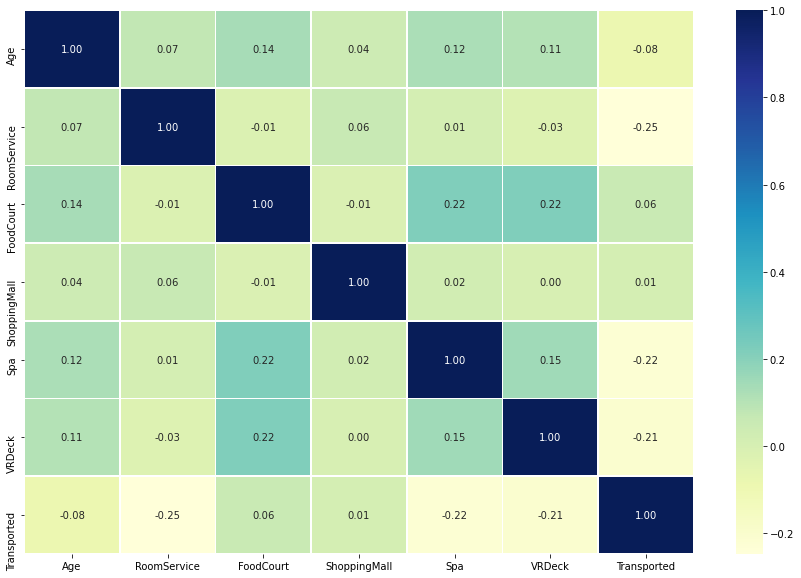

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth= 0.5,
                fmt=".2f",
                cmap="YlGnBu");


<BarContainer object of 6606 artists>

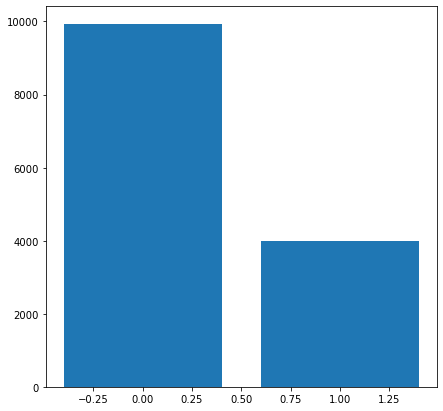

In [23]:
labels = ["True","False"]
x= np.arange(len(labels))
fig, ax = plt.subplots(figsize=(7,7))
ax.bar(df["Transported"], df["RoomService"])



In [24]:
corr_matrix["Transported"]

Age            -0.082553
RoomService    -0.247291
FoodCourt       0.055025
ShoppingMall    0.011602
Spa            -0.219854
VRDeck         -0.207950
Transported     1.000000
Name: Transported, dtype: float64

In [25]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


## Feature Engineering

#### Lumping all extra services in one columns

In [26]:
df["Total services"] = df.sum(axis=1)
df["Total services"]

<ipython-input-26-a73c6b49ca39>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Total services"] = df.sum(axis=1)


0          39.0
1         761.0
2       10441.0
3        5209.0
4        1108.0
         ...   
8688     8577.0
8689       18.0
8690     1900.0
8691     4669.0
8692     4871.0
Name: Total services, Length: 6606, dtype: float64

#### Splitting Cabin into decks and Port vs Starboard

In [27]:
df[["cabin_deck","cabin_num","cabin_side"]] = df["Cabin"].str.split("/", expand=True)

In [28]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total services,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,39.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,761.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10441.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5209.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1108.0,F,1,S


In [29]:
corr_matrix = df.corr()
corr_matrix["Transported"]

Age              -0.082553
RoomService      -0.247291
FoodCourt         0.055025
ShoppingMall      0.011602
Spa              -0.219854
VRDeck           -0.207950
Transported       1.000000
Total services   -0.191050
Name: Transported, dtype: float64

## Data Cleaning

#### Boolean columns to categories
Change 'Cryosleep' and 'VIP' attributes to boolean dtypes

In [30]:
df["CryoSleep"].value_counts()

False    4274
True     2332
Name: CryoSleep, dtype: int64

In [31]:
df["VIP"].value_counts()

False    6444
True      162
Name: VIP, dtype: int64

In [32]:
df[["CryoSleep", "VIP", "Transported"]] = df[["CryoSleep", "VIP", "Transported"]].astype("bool")

In [33]:
# View boolean colums
for label, content in df.items():
    if pd.api.types.is_bool_dtype(content):
        print(label)

CryoSleep
VIP
Transported


In [34]:
# Convert boolean attributes to categories
for label, content in df.items():
    if pd.api.types.is_bool_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

#### String columns to categories

In [35]:
# Drop name and cabin colums
df.drop(["PassengerId", "Name"], axis= 1, inplace= True)

In [36]:
# View string colums
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

HomePlanet
Cabin
Destination
cabin_deck
cabin_num
cabin_side


In [37]:
# Convert string columns to categories
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]= content.astype("category").cat.as_ordered()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HomePlanet      6606 non-null   category
 1   CryoSleep       6606 non-null   category
 2   Cabin           6606 non-null   category
 3   Destination     6606 non-null   category
 4   Age             6606 non-null   float64 
 5   VIP             6606 non-null   category
 6   RoomService     6606 non-null   float64 
 7   FoodCourt       6606 non-null   float64 
 8   ShoppingMall    6606 non-null   float64 
 9   Spa             6606 non-null   float64 
 10  VRDeck          6606 non-null   float64 
 11  Transported     6606 non-null   category
 12  Total services  6606 non-null   float64 
 13  cabin_deck      6606 non-null   category
 14  cabin_num       6606 non-null   category
 15  cabin_side      6606 non-null   category
dtypes: category(9), float64(7)
memory usage: 991.5 KB


In [39]:
# Convert categories to numerics
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      6606 non-null   int8   
 1   CryoSleep       6606 non-null   int8   
 2   Cabin           6606 non-null   int16  
 3   Destination     6606 non-null   int8   
 4   Age             6606 non-null   float64
 5   VIP             6606 non-null   int8   
 6   RoomService     6606 non-null   float64
 7   FoodCourt       6606 non-null   float64
 8   ShoppingMall    6606 non-null   float64
 9   Spa             6606 non-null   float64
 10  VRDeck          6606 non-null   float64
 11  Transported     6606 non-null   int8   
 12  Total services  6606 non-null   float64
 13  cabin_deck      6606 non-null   int8   
 14  cabin_num       6606 non-null   int16  
 15  cabin_side      6606 non-null   int8   
dtypes: float64(7), int16(2), int8(7)
memory usage: 741.9 KB


In [41]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total services,cabin_deck,cabin_num,cabin_side
0,2,1,138,3,39.0,1,0.0,0.0,0.0,0.0,0.0,1,39.0,2,1,1
1,1,1,1824,3,24.0,1,109.0,9.0,25.0,549.0,44.0,2,761.0,6,1,2
2,2,1,2,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,1,10441.0,1,1,2
3,2,1,2,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,1,5209.0,1,1,2
4,1,1,1826,3,16.0,1,303.0,70.0,151.0,565.0,2.0,2,1108.0,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,1,135,1,41.0,2,0.0,6819.0,0.0,1643.0,74.0,1,8577.0,1,1713,1
8689,1,2,4294,2,18.0,1,0.0,0.0,0.0,0.0,0.0,1,18.0,7,528,2
8690,1,1,4299,3,26.0,1,0.0,0.0,1872.0,1.0,0.0,2,1900.0,7,531,2
8691,2,1,1779,1,32.0,1,0.0,1049.0,0.0,353.0,3235.0,1,4669.0,5,1317,2


In [42]:
# View null values
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Total services    0
cabin_deck        0
cabin_num         0
cabin_side        0
dtype: int64

In [43]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

HomePlanet
CryoSleep
Cabin
Destination
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported
Total services
cabin_deck
cabin_num
cabin_side


In [44]:
# Fill numeric rows with median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

In [45]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Total services    0
cabin_deck        0
cabin_num         0
cabin_side        0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      6606 non-null   int8   
 1   CryoSleep       6606 non-null   int8   
 2   Cabin           6606 non-null   int16  
 3   Destination     6606 non-null   int8   
 4   Age             6606 non-null   float64
 5   VIP             6606 non-null   int8   
 6   RoomService     6606 non-null   float64
 7   FoodCourt       6606 non-null   float64
 8   ShoppingMall    6606 non-null   float64
 9   Spa             6606 non-null   float64
 10  VRDeck          6606 non-null   float64
 11  Transported     6606 non-null   int8   
 12  Total services  6606 non-null   float64
 13  cabin_deck      6606 non-null   int8   
 14  cabin_num       6606 non-null   int16  
 15  cabin_side      6606 non-null   int8   
dtypes: float64(7), int16(2), int8(7)
memory usage: 741.9 KB


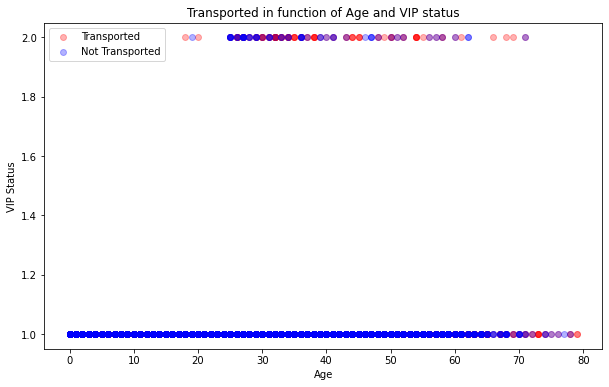

In [47]:
plt.figure(figsize=(10, 6))
# Heartrate for patients with heart disease
plt.scatter(df[df["Transported"] == 1]["Age"],
            df[df["Transported"] == 1]["VIP"],
           c="red", alpha= .3)
# Heartrate for patients without heart disease
plt.scatter(df[df["Transported"]==2]["Age"],
            df[df["Transported"]==2]["VIP"],
           c="blue",alpha=0.3)

plt.title("Transported in function of Age and VIP status")
plt.xlabel("Age")
plt.ylabel("VIP Status")
plt.legend(["Transported", "Not Transported"]);

Its appear VIP status increased likely hood of being transported unless you are VIP and over the age of 65

In [48]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Total services', 'cabin_deck', 'cabin_num',
       'cabin_side'],
      dtype='object')

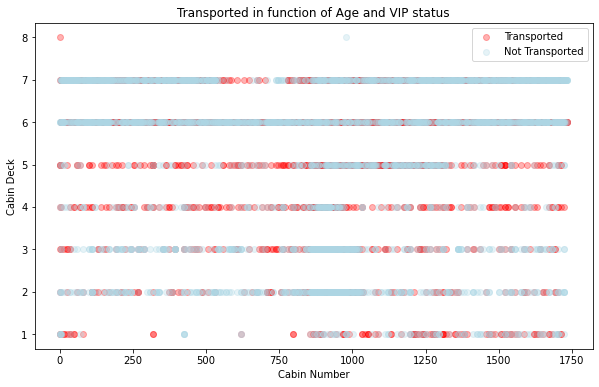

In [49]:
plt.figure(figsize=(10, 6))
# Heartrate for patients with heart disease
plt.scatter(df[df["Transported"] == 1]["cabin_num"],
            df[df["Transported"] == 1]["cabin_deck"],
           c="red", alpha= .3)
# Heartrate for patients without heart disease
plt.scatter(df[df["Transported"]==2]["cabin_num"],
            df[df["Transported"]==2]["cabin_deck"],
           c="lightblue",alpha=0.3)

plt.title("Transported in function of Age and VIP status")
plt.xlabel("Cabin Number")
plt.ylabel("Cabin Deck")
plt.legend(["Transported", "Not Transported"]);

In [50]:
# the percentage of passengers transported per deck
df.groupby("cabin_deck")["Transported"].mean().sort_values(ascending=False)

cabin_deck
2    1.729299
3    1.679727
7    1.521034
8    1.500000
1    1.487923
6    1.435409
4    1.422460
5    1.358712
Name: Transported, dtype: float64

## Modelling

In [51]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total services,cabin_deck,cabin_num,cabin_side
0,2,1,138,3,39.0,1,0.0,0.0,0.0,0.0,0.0,1,39.0,2,1,1
1,1,1,1824,3,24.0,1,109.0,9.0,25.0,549.0,44.0,2,761.0,6,1,2
2,2,1,2,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,1,10441.0,1,1,2
3,2,1,2,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,1,5209.0,1,1,2
4,1,1,1826,3,16.0,1,303.0,70.0,151.0,565.0,2.0,2,1108.0,6,2,2


### Split Data into train/validation sets

In [52]:
# Split train/valid
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(df, test_size=0.2, random_state=42)

len(train_set), len(valid_set)

(5284, 1322)

In order to insure proper represenatation, lets split data into homegenous subgroups

### Divide data in homegenous subgroups

<AxesSubplot:>

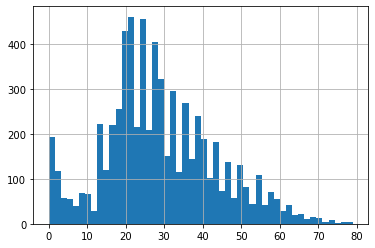

In [53]:
df["Age"].hist(bins=50)

In [54]:
# create age category
df["Age_Cat"] = pd.cut(df["Age"],
                  bins=[0.,16.,32.,48.,64., np.inf],
                  labels=[1,2,3,4,5])

<AxesSubplot:>

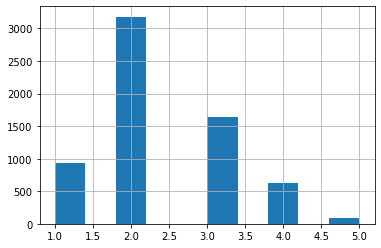

In [55]:
df["Age_Cat"].hist()

Now we can do stratified random sampling based on `Age_cat`

In [56]:
df["Age_Cat"].isnull().sum()

140

In [57]:
df = df.dropna()

In [58]:
df["Age_Cat"].isnull().sum()

0

In [59]:
df.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Total services    0
cabin_deck        0
cabin_num         0
cabin_side        0
Age_Cat           0
dtype: int64

In [60]:
#Stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(df, df["Age_Cat"]):
        strat_train_set = df.iloc[train_index]
        strat_valid_set = df.iloc[valid_index]

<AxesSubplot:>

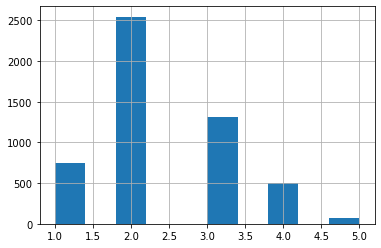

In [61]:
strat_train_set["Age_Cat"].hist()

<AxesSubplot:>

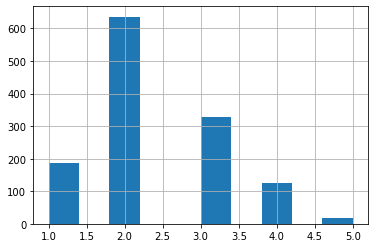

In [62]:
strat_valid_set["Age_Cat"].hist()

Train and Valid test set are virtually identical in distribution and is representative of various age category in the whole data set. Now lets split train/valid the tradiontal way using train_test_split and compare with stratified methods

In [63]:
train_set, valid_set = train_test_split(df, test_size=0.2, random_state=42)

In [64]:
# veiw the income cat proprotions to valid set
df_compare = pd.DataFrame()
df_compare["Overall"] = (df["Age_Cat"].value_counts()/len(df["Age_Cat"])).sort_index()
df_compare["Stratified"] = (strat_valid_set["Age_Cat"].value_counts()/len(strat_valid_set["Age_Cat"])).sort_index()
df_compare["Random"] = (valid_set["Age_Cat"].value_counts()/len(valid_set["Age_Cat"])).sort_index()
#view how of representation is as compared to the overall data
df_compare["Strat.%error"]= 100 * (df_compare["Overall"]- df_compare["Stratified"])/ df_compare["Overall"]
df_compare["Rand.%error"]= 100 *(df_compare["Overall"]- df_compare["Random"])/ df_compare["Random"]

In [65]:
df_compare

,Overall,Stratified,Random,Strat.%error,Rand.%error
1,0.144448,0.144513,0.142968,-0.045176,1.035437
2,0.491958,0.491499,0.508501,0.093241,-3.253257
3,0.254408,0.254250,0.237249,0.061824,7.232419
4,0.096350,0.096600,0.102009,-0.259005,-5.547667
5,0.012836,0.013138,0.009274,-2.346325,38.418909


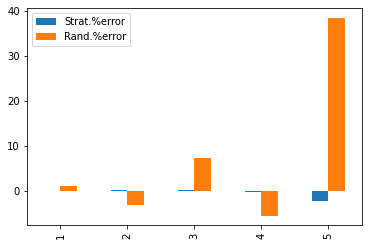

In [66]:
df_compare[["Strat.%error", "Rand.%error"]].plot(kind="bar")
plt.show()

Now you we will remove the income_cat attribute so the data is back to it original state

In [67]:
for set_ in (strat_train_set, strat_valid_set):
    set_.drop("Age_Cat", axis=1, inplace= True)
    


C:\Users\JeanD\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
strat_train_set

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total services,cabin_deck,cabin_num,cabin_side
5550,2,1,74,1,26.0,1,0.0,2427.0,15.0,5.0,0.0,2,2474.0,1,1253,1
6777,3,1,1630,3,11.0,1,0.0,0.0,0.0,0.0,0.0,2,12.0,5,1171,2
112,2,1,1134,3,33.0,1,1.0,2223.0,0.0,12.0,404.0,2,2674.0,4,1088,1
472,3,2,3600,3,23.0,1,0.0,0.0,0.0,0.0,0.0,2,24.0,6,1641,2
4938,1,1,1851,1,37.0,1,0.0,0.0,163.0,0.0,486.0,2,687.0,6,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,3,1,3401,3,8.0,1,0.0,0.0,0.0,0.0,0.0,2,9.0,6,1462,1
2895,3,1,3232,3,38.0,1,886.0,0.0,618.0,0.0,0.0,1,1542.0,6,1295,2
8060,3,2,2690,1,20.0,1,0.0,0.0,0.0,0.0,0.0,2,21.0,6,767,1
6095,1,2,3772,1,5.0,1,0.0,0.0,0.0,0.0,0.0,2,6.0,7,54,2


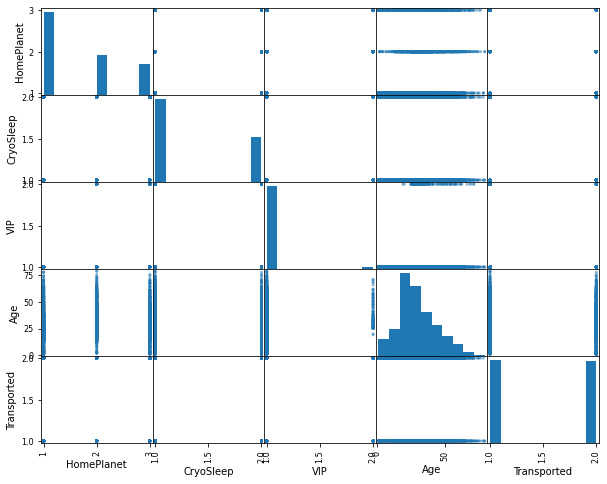

In [70]:
from pandas.plotting import scatter_matrix
attributes = ["HomePlanet", "CryoSleep", "VIP", "Age", "Transported"] #choose columns
scatter_matrix(strat_train_set[attributes],
              figsize=(10, 8))
plt.show()

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(strat_train_set)

## Train and Evaluate Training set

In [72]:
X_train, y_train = strat_train_set.drop("Transported", axis= 1), strat_train_set["Transported"]
X_valid, y_valid = strat_valid_set.drop("Transported", axis= 1), strat_valid_set["Transported"]

In [73]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((5172, 15), (5172,), (1294, 15), (1294,))

In [74]:
# import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import Model Evaluations
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, plot_confusion_matrix, plot_roc_curve

## We're going to try three different Models
1. LogisticRegression
2. KNeighborsClassifier
3. RandomForestClassifier

In [75]:
# Dictionary to try the models

models = {"LogRegression": LogisticRegression(solver="liblinear"), 
         "KNeighbors": KNeighborsClassifier(),
         "RandomForest": RandomForestClassifier()}

# Function to fit and score models

def fit_and_score(models, X_train, X_Valid, y_train, y_valid):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """ 
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_valid, y_valid)
    return model_scores

In [76]:
model_scores = fit_and_score(models, X_train, X_valid, y_train, y_valid)
model_scores

{'LogRegression': 1.0,
 'KNeighbors': 0.7527047913446677,
 'RandomForest': 0.8021638330757341}

## Model Comparision

In [77]:
score_df = pd.DataFrame(model_scores, index=["Accuracy Scores"])

**Default Scores Metrics**

In [78]:
score_df

,LogRegression,KNeighbors,RandomForest
Accuracy Scores,1.0,0.752705,0.802164


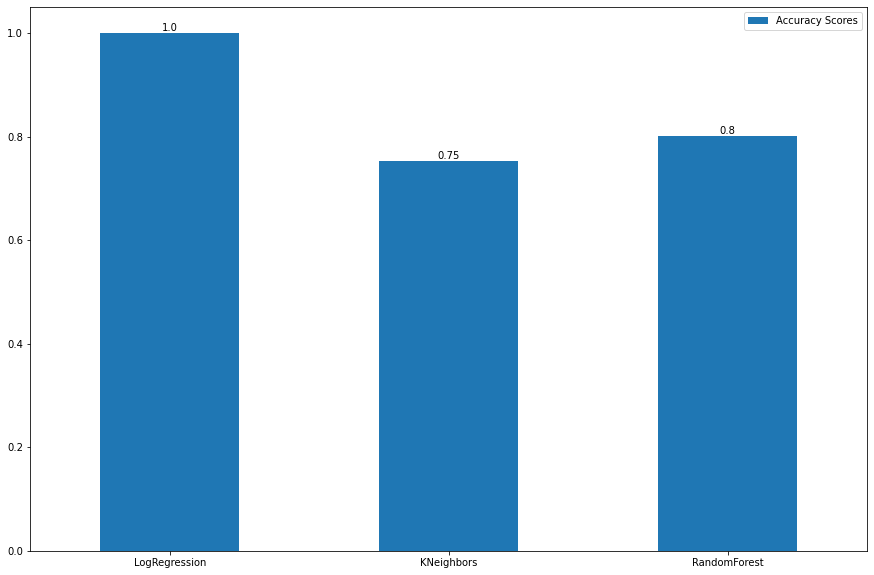

''

In [79]:
ax = score_df.T.plot(kind="bar", figsize=(15,10))
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(s=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()
;

# Experimentation
* Hyperperameter tuning
* Feature importance
* Classification metrics:
* Confusion matrix
* Cross-validation
* Pricision
* Recall
* F1 score
* Classification rport
* ROC curve
* Area under the curve (AUC)

## Hyperparameter Tuning

### Logistic Regression - RandomizedSearchCV

In [80]:
# Hyperparameter grid for LogisticRegression

logReg_grid = {"C": np.logspace(-4, 4, 20),
              "solver": ["newton-cg", "lbfgs", "liblinear"]}

In [81]:
from sklearn.model_selection import RandomizedSearchCV

logReg_randsearch = RandomizedSearchCV(estimator= LogisticRegression(),
                                          param_distributions= logReg_grid,
                                          cv= 5,
                                          n_iter = 20,
                                          verbose= True)

logReg_randsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [82]:
#Best Parameters
logReg_randsearch.best_params_

{'solver': 'newton-cg', 'C': 545.5594781168514}

In [83]:
logReg_randsearch.score(X_valid, y_valid)

1.0

### KNN

In [84]:
train_scores = []
valid_scores = []

knn = KNeighborsClassifier()
neighbors = range(1,21)

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    valid_scores.append(knn.score(X_valid, y_valid))

In [85]:
train_scores

[1.0,
 0.871616395978345,
 0.8667826759474091,
 0.8410672853828306,
 0.8408739365815932,
 0.8360402165506574,
 0.8331399845320959,
 0.8259860788863109,
 0.8281129156999226,
 0.8236658932714617,
 0.8250193348801237,
 0.82153905645785,
 0.819798917246713,
 0.8174787316318639,
 0.8174787316318639,
 0.8149651972157773,
 0.8138051044083526,
 0.8155452436194895,
 0.8132250580046404,
 0.813031709203403]

In [86]:
valid_scores

[0.7202472952086554,
 0.7264296754250387,
 0.741112828438949,
 0.7511591962905718,
 0.7527047913446677,
 0.7449768160741885,
 0.750386398763524,
 0.7581143740340031,
 0.7511591962905718,
 0.758887171561051,
 0.7650695517774343,
 0.7642967542503863,
 0.7666151468315301,
 0.7542503863987635,
 0.7612055641421948,
 0.7658423493044823,
 0.7627511591962906,
 0.768160741885626,
 0.767387944358578,
 0.7619783616692427]

Highest test score when tuning n_neighbors:  76.82%


<Figure size 432x288 with 0 Axes>

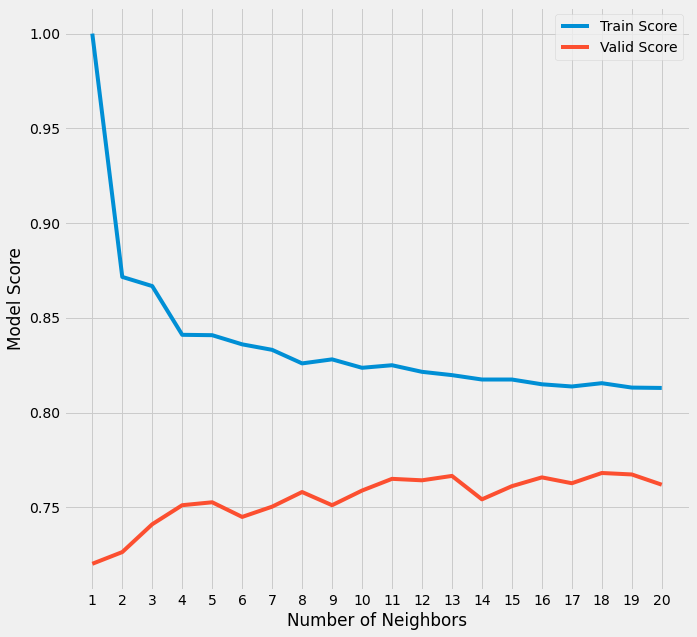

In [87]:
plt.style.use('fivethirtyeight')
plt.tight_layout()
fig, ax = plt.subplots(figsize= (10,10))
ax = plt.plot(neighbors, train_scores, label= "Train Score")
plt.plot(neighbors, valid_scores, label ="Valid Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Highest test score when tuning n_neighbors: {max(valid_scores)*100: .2f}%")


### RandomForestClassifier - RandomizedSeacrhCV

In [88]:
# Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
                  "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2)}

In [89]:
RandForest_randsearch = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                         param_distributions=rf_grid,
                                         cv=5,
                                         verbose= True,
                                         n_iter= 50)

RandForest_randsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [90]:
#Best hyperparameters
RandForest_randsearch.best_params_

{'n_estimators': 510,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [91]:
# RandomForestClossifer accuracy score
RandForest_randsearch.score(X_valid, y_valid)

0.8068006182380216

## Hyperparameter Tuning RandomForest Regression with GridSearchCV

In [92]:
from sklearn.model_selection import GridSearchCV
grid_rf = {'n_estimators': [710, 810],
            'min_samples_split': [10, 12],
            'min_samples_leaf': [10, 11],
            'max_depth': [0,1]}

RandForest_grid = GridSearchCV(estimator = RandomForestClassifier(),
                              param_grid=grid_rf,
                              verbose=True,
                              cv=5)
RandForest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [93]:
# best hyperparameters
RandForest_grid.best_params_

{'max_depth': 1,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 710}

In [94]:
RandForest_grid.score(X_valid, y_valid)

0.7357032457496137

In [95]:
RandForest_grid.score(X_train, y_train)

0.7310518174787316

## Evaluation of tuned machine learning classifier, beyond default accuracy score
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [96]:
valid_preds = RandForest_grid.predict(X_valid)

#### Confusion Matrix

In [97]:
confu_mat = confusion_matrix(y_valid, valid_preds)
confu_mat

array([[543, 111],
       [231, 409]], dtype=int64)

#### Classification Report

In [98]:
cr = classification_report(y_valid, valid_preds)
print(cr)

              precision    recall  f1-score   support

           1       0.70      0.83      0.76       654
           2       0.79      0.64      0.71       640

    accuracy                           0.74      1294
   macro avg       0.74      0.73      0.73      1294
weighted avg       0.74      0.74      0.73      1294



In [99]:
precision_score(y_valid, valid_preds)

0.7015503875968992

#### Recall

In [100]:
recall_score(y_valid, valid_preds)

0.8302752293577982

#### F1

In [101]:
from sklearn.model_selection import cross_val_score
cv_f1 = cross_val_score(RandForest_grid, X_valid, y_valid, scoring= "recall", cv=5)
cv_f1

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   47.1s finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   49.5s finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   49.0s finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   52.3s finished


array([0.85496183, 0.80152672, 0.77862595, 0.84732824, 0.86923077])

In [102]:
cv_recall_mean =  np.mean(cv_f1)
cv_recall_mean

0.8303347034644745

## Prediction on Test Data

In [103]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### Preprocessing test data to the same format as training dataset

In [104]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df
    """
    df.drop(["PassengerId", "Name"], axis=1, inplace= True)
    df["Total services"] = df.sum(axis=1)
    df[["cabin_deck","cabin_num","cabin_side"]] = df["Cabin"].str.split("/", expand=True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
    # Fill categorical missing data and turn categories into number
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1    
    return df

In [105]:
df_test = preprocess_data(df_test)
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total services,cabin_deck,cabin_num,cabin_side
0,1,2,2785,3,27.0,1,0.0,0.0,0.0,0.0,0.0,27.0,7,821,2
1,1,1,1868,3,19.0,1,0.0,9.0,0.0,2823.0,0.0,2851.0,6,928,2
2,2,2,258,1,31.0,1,0.0,0.0,0.0,0.0,0.0,31.0,3,1,2
3,2,1,260,3,38.0,1,0.0,6652.0,0.0,181.0,585.0,7456.0,3,2,2
4,1,1,1941,3,20.0,1,10.0,0.0,635.0,0.0,0.0,665.0,6,1030,2


In [106]:
# Predict Transportation of Passengers

In [107]:
test_preds = RandForest_grid.predict(df_test)
test_preds

array([2, 1, 2, ..., 2, 1, 2], dtype=int8)

In [108]:
# Format prediction saleid, sale price
df = pd.read_csv("test.csv")
df_preds = pd.DataFrame()

df_preds["PassengerId"] = df["PassengerId"]
df_preds["Transported"] = test_preds
df_preds

,PassengerId,Transported
0,0013_01,2
1,0018_01,1
2,0019_01,2
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,2
4273,9269_01,1
4274,9271_01,2
4275,9273_01,1


In [110]:
df_preds = df_preds.replace({"Transported": {1:"False", 2:"True"}})
df_preds.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [111]:
import os
os.getcwd()

'C:\\Users\\JeanD\\Desktop\\Data\\ML\\Project_9_Spaceship Titanic_Classification'

In [112]:
df_preds.to_csv('C:\\Users\\JeanD\\Desktop\\Data\\ML\\Project_9_Spaceship Titanic_Classification\\test_predictions', index= False)